# Bayesian Classifier Fake News


> Autor: Luis Rojas Rubio


> Dataset: 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
df =pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcopFake_convertido.csv')
df

,Unnamed: 0,Unnamed: 0.1,Tweet,label
0,0.0,0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,1.0,1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,2.0,2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,NaN,Unnamed: 0,Tweet,label
4,0.0,0,"@malpaso Um, exuse me. Disinterest in the arts...",fake
...,...,...,...,...
465304,143.0,143,No Cinderella: Margo Jefferson on the real Meg...,fake
465305,144.0,144,No Cinderella: Margo Jefferson on the real Meg...,fake
465306,145.0,145,"Excellent, wonderful article! No Cindere...",fake
465307,146.0,146,No Cinderella: Margo Jefferson on the real Meg...,fake


In [ ]:
df1 =pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcopReal_convertido.csv')
df1

,Unnamed: 0,Unnamed: 0.1,Tweet,label
0,0.0,0,All the Details on Teen Mom Star Jenelle Evans...,noFake
1,1.0,1,All the Details on Teen Mom Star Jenelle Evans...,noFake
2,2.0,2,All the Details on Teen Mom Star Jenelle Evans...,noFake
3,3.0,3,All the Details on Teen Mom Star Jenelle Evans...,noFake
4,4.0,4,All the Details on Teen Mom Star Jenelle Evans...,noFake
...,...,...,...,...
1250949,33.0,33,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250950,34.0,34,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250951,35.0,35,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1250952,36.0,36,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


## Pre procesamiento

### Eliminar celdas vacías

In [ ]:
df = df.dropna()
df

,Unnamed: 0,Unnamed: 0.1,Tweet,label
0,0.0,0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,1.0,1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,2.0,2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
4,0.0,0,"@malpaso Um, exuse me. Disinterest in the arts...",fake
5,1.0,1,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...,...,...
465304,143.0,143,No Cinderella: Margo Jefferson on the real Meg...,fake
465305,144.0,144,No Cinderella: Margo Jefferson on the real Meg...,fake
465306,145.0,145,"Excellent, wonderful article! No Cindere...",fake
465307,146.0,146,No Cinderella: Margo Jefferson on the real Meg...,fake


In [ ]:
df1 = df1.dropna()
df1

,Unnamed: 0,Unnamed: 0.1,Tweet,label
0,0.0,0,All the Details on Teen Mom Star Jenelle Evans...,noFake
1,1.0,1,All the Details on Teen Mom Star Jenelle Evans...,noFake
2,2.0,2,All the Details on Teen Mom Star Jenelle Evans...,noFake
3,3.0,3,All the Details on Teen Mom Star Jenelle Evans...,noFake
4,4.0,4,All the Details on Teen Mom Star Jenelle Evans...,noFake
...,...,...,...,...
1250949,33.0,33,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250950,34.0,34,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250951,35.0,35,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1250952,36.0,36,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


In [ ]:
dff = df.append(df1)
dff

,Unnamed: 0,Unnamed: 0.1,Tweet,label
0,0.0,0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,1.0,1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,2.0,2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
4,0.0,0,"@malpaso Um, exuse me. Disinterest in the arts...",fake
5,1.0,1,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...,...,...
1250949,33.0,33,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250950,34.0,34,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250951,35.0,35,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1250952,36.0,36,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


### Eliminar features innecesarias

In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Unnamed: 0.1',axis=1)

In [ ]:
df

,Tweet,label
0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
4,"@malpaso Um, exuse me. Disinterest in the arts...",fake
5,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...
465304,No Cinderella: Margo Jefferson on the real Meg...,fake
465305,No Cinderella: Margo Jefferson on the real Meg...,fake
465306,"Excellent, wonderful article! No Cindere...",fake
465307,No Cinderella: Margo Jefferson on the real Meg...,fake


In [ ]:
df1=df1.drop('Unnamed: 0',axis=1)
df1=df1.drop('Unnamed: 0.1',axis=1)

In [ ]:
df1

,Tweet,label
0,All the Details on Teen Mom Star Jenelle Evans...,noFake
1,All the Details on Teen Mom Star Jenelle Evans...,noFake
2,All the Details on Teen Mom Star Jenelle Evans...,noFake
3,All the Details on Teen Mom Star Jenelle Evans...,noFake
4,All the Details on Teen Mom Star Jenelle Evans...,noFake
...,...,...
1250949,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250950,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1250951,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1250952,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


Reiniciar indices para evitar duplicidad

In [ ]:
X.reset_index(inplace=True)


In [ ]:
X

,index,Tweet,label
0,0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,4,"@malpaso Um, exuse me. Disinterest in the arts...",fake
4,5,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...,...
1686148,1250949,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1686149,1250950,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1686150,1250951,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1686151,1250952,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


Eliminamos la columna de indice antigua

In [ ]:
X=X.drop('index',axis=1)

In [ ]:
X

,Tweet,label
0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,"@malpaso Um, exuse me. Disinterest in the arts...",fake
4,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...
1686148,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1686149,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1686150,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1686151,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


In [ ]:
i=0
j=0
for a in X["label"]:
  if a=="noFake":
    i+=1
  elif a=="fake":
    j+=1
print(f'noFake: {i}')
print(f'Fake: {j}')

noFake: 1225965
Fake: 460188


Eliminamos las URLs

In [ ]:
df['Tweet'][0]

'5 Wrong Rumors About Ben Affleck, Matt Damon Friendship https://t.co/2h4OYxeEdl https://t.co/7D4Qe4HCCG'

In [ ]:
df.reset_index(inplace=True)
df=df.drop('index',axis=1)
df

,Tweet,label
0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,"@malpaso Um, exuse me. Disinterest in the arts...",fake
4,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...
460183,No Cinderella: Margo Jefferson on the real Meg...,fake
460184,No Cinderella: Margo Jefferson on the real Meg...,fake
460185,"Excellent, wonderful article! No Cindere...",fake
460186,No Cinderella: Margo Jefferson on the real Meg...,fake


In [ ]:
df1.reset_index(inplace=True)
df1=df1.drop('index',axis=1)
df1

,Tweet,label
0,All the Details on Teen Mom Star Jenelle Evans...,noFake
1,All the Details on Teen Mom Star Jenelle Evans...,noFake
2,All the Details on Teen Mom Star Jenelle Evans...,noFake
3,All the Details on Teen Mom Star Jenelle Evans...,noFake
4,All the Details on Teen Mom Star Jenelle Evans...,noFake
...,...,...
1225960,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1225961,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1225962,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1225963,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


In [ ]:
import re
def quitarURL(df):
  for i in range(0,len(df)):#len(m)):
    df['Tweet'][i] = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*',' ',df['Tweet'][i])
    if (i%500==0):
      print(f'Avance: {(i+1)*100/len(df)} %')
  return df

In [ ]:
df = quitarURL(df)

Avance: 0.00021730249376341842 %
Avance: 0.10886854937547263 %
Avance: 0.21751979625718185 %
Avance: 0.32617104313889106 %
Avance: 0.4348222900206003 %
Avance: 0.5434735369023095 %
Avance: 0.6521247837840187 %
Avance: 0.760776030665728 %
Avance: 0.8694272775474371 %
Avance: 0.9780785244291463 %
Avance: 1.0867297713108555 %
Avance: 1.1953810181925648 %
Avance: 1.304032265074274 %
Avance: 1.4126835119559833 %
Avance: 1.5213347588376924 %
Avance: 1.6299860057194016 %
Avance: 1.738637252601111 %
Avance: 1.84728849948282 %
Avance: 1.9559397463645294 %
Avance: 2.0645909932462385 %
Avance: 2.173242240127948 %
Avance: 2.2818934870096568 %
Avance: 2.390544733891366 %
Avance: 2.4991959807730755 %
Avance: 2.6078472276547844 %
Avance: 2.7164984745364937 %
Avance: 2.825149721418203 %
Avance: 2.933800968299912 %
Avance: 3.0424522151816213 %
Avance: 3.1511034620633307 %
Avance: 3.25975470894504 %
Avance: 3.368405955826749 %
Avance: 3.4770572027084583 %
Avance: 3.5857084495901677 %
Avance: 3.694359696

In [ ]:
df.to_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcopFake_convertido_sURL.csv')

In [ ]:
df1 = quitarURL(df1)

Avance: 8.1568397140212e-05 %
Avance: 0.04086576696724621 %
Avance: 0.08164996553735221 %
Avance: 0.12243416410745821 %
Avance: 0.1632183626775642 %
Avance: 0.2040025612476702 %
Avance: 0.2447867598177762 %
Avance: 0.2855709583878822 %
Avance: 0.3263551569579882 %
Avance: 0.3671393555280942 %
Avance: 0.4079235540982002 %
Avance: 0.4487077526683062 %
Avance: 0.4894919512384122 %
Avance: 0.5302761498085182 %
Avance: 0.5710603483786242 %
Avance: 0.6118445469487301 %
Avance: 0.6526287455188362 %
Avance: 0.6934129440889422 %
Avance: 0.7341971426590482 %
Avance: 0.7749813412291542 %
Avance: 0.8157655397992601 %
Avance: 0.8565497383693662 %
Avance: 0.8973339369394722 %
Avance: 0.9381181355095781 %
Avance: 0.9789023340796842 %
Avance: 1.0196865326497901 %
Avance: 1.0604707312198962 %
Avance: 1.101254929790002 %
Avance: 1.1420391283601081 %
Avance: 1.1828233269302142 %
Avance: 1.2236075255003203 %
Avance: 1.264391724070426 %
Avance: 1.3051759226405322 %
Avance: 1.3459601212106382 %
Avance: 1.38

In [ ]:
df1.to_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcopReal_convertido_sURL.csv')

Eliminar duplicados

In [ ]:
df =pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcopFake_convertido_sURL.csv')

In [ ]:
dnf =pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcopReal_convertido_sURL.csv')

In [ ]:
dff = df.append(dnf)

In [ ]:
dff.reset_index(inplace=True)
dff=dff.drop('Unnamed: 0',axis=1)
dff=dff.drop('index',axis=1)
dff

,Tweet,label
0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,"@malpaso Um, exuse me. Disinterest in the arts...",fake
4,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...
1686148,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1686149,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
1686150,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake
1686151,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


In [ ]:
dff.shape

(1686153, 2)

In [ ]:
dff = dff.drop_duplicates(subset="Tweet", keep="last")

In [ ]:
dff.shape

(567852, 2)

In [ ]:
dff.reset_index(inplace=True)
dff=dff.drop('index',axis=1)
dff

,Tweet,label
0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,"@malpaso Um, exuse me. Disinterest in the arts...",fake
4,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...
567847,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
567848,Jada Pinkett Smith Was “Devastated” When Jaden...,noFake
567849,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
567850,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


In [ ]:
i=0
j=0
for a in dff["label"]:
  if a=="noFake":
    i+=1
  elif a=="fake":
    j+=1
print(f'noFake: {i}')
print(f'Fake: {j}')

noFake: 283962
Fake: 283890


In [ ]:
dff.to_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcop_convertido_sURL.csv')

In [ ]:
dff = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcop_convertido_sURL.csv')

In [ ]:
i=0
j=0
for a in dff["label"]:
  if a=="noFake":
    i+=1
  elif a=="fake":
    j+=1
print(f'noFake: {i}')
print(f'Fake: {j}')

noFake: 283962
Fake: 283890


### Stemming, eliminar stopwords y puntuaciones

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()
def stemming(m):
  corpus = []
  for i in range(0,len(m)):
    if (i%10==0):
      print(f'Avance: {(i+1)*100/len(m)} %')
    
    
    review = re.sub('[^a-zA-Z]', ' ', m['Tweet'][i])
    
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
  return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
messages = dff.copy()
messages

,Tweet,label
0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,"@malpaso Um, exuse me. Disinterest in the arts...",fake
4,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...
567847,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
567848,Jada Pinkett Smith Was “Devastated” When Jaden...,noFake
567849,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
567850,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


In [ ]:
messages =pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcop_convertido_sURL.csv')
messages=messages.drop('Unnamed: 0',axis=1)
messages

,Tweet,label
0,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
1,"5 Wrong Rumors About Ben Affleck, Matt Damon F...",fake
2,5 Wrong Rumors About Ben Affleck And Matt Damo...,fake
3,"@malpaso Um, exuse me. Disinterest in the arts...",fake
4,"Hey TV execs, I would watch The Gong Show.",fake
...,...,...
567847,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
567848,Jada Pinkett Smith Was “Devastated” When Jaden...,noFake
567849,"Jada Pinkett Smith Was ""Devastated"" When Jaden...",noFake
567850,Jada Pinkett Smith Was &amp;quot;Devastated&am...,noFake


In [ ]:
corpus = stemming(messages)

Se han truncado las últimas 5000 líneas del flujo de salida.
Avance: 91.19647372907025 %
Avance: 91.19823475130843 %
Avance: 91.19999577354663 %
Avance: 91.20175679578482 %
Avance: 91.203517818023 %
Avance: 91.2052788402612 %
Avance: 91.20703986249939 %
Avance: 91.20880088473757 %
Avance: 91.21056190697576 %
Avance: 91.21232292921395 %
Avance: 91.21408395145214 %
Avance: 91.21584497369032 %
Avance: 91.21760599592852 %
Avance: 91.21936701816671 %
Avance: 91.22112804040489 %
Avance: 91.22288906264308 %
Avance: 91.22465008488128 %
Avance: 91.22641110711946 %
Avance: 91.22817212935765 %
Avance: 91.22993315159584 %
Avance: 91.23169417383403 %
Avance: 91.23345519607221 %
Avance: 91.2352162183104 %
Avance: 91.2369772405486 %
Avance: 91.23873826278678 %
Avance: 91.24049928502497 %
Avance: 91.24226030726317 %
Avance: 91.24402132950135 %
Avance: 91.24578235173954 %
Avance: 91.24754337397772 %
Avance: 91.24930439621592 %
Avance: 91.2510654184541 %
Avance: 91.25282644069229 %
Avance: 91.2545874629

In [ ]:
len(corpus)

567852

In [ ]:
corpus

['wrong rumor ben affleck matt damon friendship',
 'wrong rumor ben affleck matt damon friendship getti imag ben affleck',
 'wrong rumor ben affleck matt damon friendship',
 'malpaso um exus disinterest art hello american idol danc star new gong show need watch tv',
 'hey tv exec would watch gong show',
 'one reason watch reilli factor call gong show th worst tv show ever gong show rule peopl',
 'chillin bro watch jay z load damn watch tv doin gong show ride die look like',
 'klein true confess use watch gong show tv soemth everybodi',
 'beast watch kind talent competit tv sinc childhood gong show',
 'finish watch gong xin ji wat show shld watch nxt mayb continu gem life frm tv stop ti wk haha',
 'jon stewart oreilli jon stewart oreilli jon stewart gong oreilli factor tv show get watch interview right',
 'local news peopl citi channel horrend like watch contest gong show wonder watch tv',
 'total gong show find somewher watch game final front tv',
 'watch gong show tran tv serious some

In [ ]:
corpus[0]

'wrong rumor ben affleck matt damon friendship'

eliminamos corpus duplicado

In [ ]:
df = pd.DataFrame({"Tweet":corpus,"label":messages["label"]},columns=["Tweet","label"])
df = df.drop_duplicates(subset="Tweet", keep="last")
df

,Tweet,label
1,wrong rumor ben affleck matt damon friendship ...,fake
2,wrong rumor ben affleck matt damon friendship,fake
3,malpaso um exus disinterest art hello american...,fake
4,hey tv exec would watch gong show,fake
5,one reason watch reilli factor call gong show ...,fake
...,...,...
567840,hollywood film award complet list winner,noFake
567841,hollywood film award complet list winner foxme...,noFake
567849,jada pinkett smith devast jaden ask move age,noFake
567850,jada pinkett smith amp quot devast amp quot ja...,noFake


In [ ]:
df.to_csv('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/gossipcop_final.csv')

In [ ]:
type(corpus)

list

In [ ]:
from sklearn.externals import joblib
joblib.dump(df, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/corpus.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/corpus.joblib']

In [ ]:
df["Tweet"]

1         wrong rumor ben affleck matt damon friendship ...
2             wrong rumor ben affleck matt damon friendship
3         malpaso um exus disinterest art hello american...
4                         hey tv exec would watch gong show
5         one reason watch reilli factor call gong show ...
                                ...                        
567840             hollywood film award complet list winner
567841    hollywood film award complet list winner foxme...
567849         jada pinkett smith devast jaden ask move age
567850    jada pinkett smith amp quot devast amp quot ja...
567851    jada pinkett smith devast jaden ask move age j...
Name: Tweet, Length: 428968, dtype: object

## Tf Idf

In [ ]:
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

sw = stopwords.words('english')
# print(sw)
vectorizer = CountVectorizer(stop_words=sw, token_pattern=r'[^\d\W]+',max_features=20000)

#freq_matrix = vectorizer.fit_transform(corpus)
joblib.dump(df, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/df.joblib')
#joblib.dump(corpus, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/corpus.joblib')
#joblib.dump(vectorizer, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/vectorizer.joblib')
#joblib.dump(freq_matrix, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/freqMatrix.joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/df.joblib']

In [ ]:
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
df = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/df.joblib')
#corpus = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/corpus.joblib')
#messages = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/messages.joblib')
#freq_matrix = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/freqMatrix.joblib')
#vectorizer = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/vectorizer.joblib')
#X = vectorizer.transform(['the dog barks'])


In [ ]:
corpus = df["Tweet"]
y = df["label"]
print(len(corpus))


KeyError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
sw = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=sw, token_pattern=r'[^\d\W]+',max_features=20000)

freq_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
#df = pd.DataFrame(doc_term_matrix)
#opcion2
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(freq_matrix)
#df = pd.DataFrame(tfidf_matrix,columns=feature_names)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nFeatures = len(feature_names)
nFeatures

20000

In [ ]:
ocurrences = tfidf_matrix.shape[0]

In [ ]:
type(tfidf_matrix)


scipy.sparse.csr.csr_matrix

In [ ]:
from scipy.sparse import csr_matrix
df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix,columns=feature_names)

In [ ]:
df

,aa,aaa,aaaa,aaaaa,aaah,aac,aaliyah,aan,aangieharmon,aaron,aaronleetasjan,aarp,ab,aba,abandon,abandonn,abasolo,abba,abbey,abbi,abbott,abc,abcnetwork,abcnew,abcpolit,abcworldnew,abd,abduct,abdul,abe,abel,aber,abercrombi,abfalecbaldwin,abi,abid,abigail,abigailspenc,abil,abl,...,ziegler,zien,zijn,zika,zimbabw,zinedin,zip,ziplin,zippednew,zlatan,zm,zo,zodiac,zoe,zoesaldana,zoey,zoila,zolciak,zombi,zombiietara,zona,zone,zoo,zooey,zooeydeschanel,zooland,zoom,zootopia,zsa,zu,zuckerberg,zum,zuma,zumba,zur,zweifach,zweit,zylka,zyncnewsfe,zyru
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Total de features

Tf Idf para la palabra covid

In [ ]:
df['pari']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
428963    0.0
428964    0.0
428965    0.0
428966    0.0
428967    0.0
Name: pari, Length: 428968, dtype: Sparse[float64, 0]

## Conjunto de Entrenamiento y conjunto de Prueba

In [ ]:
i = 0
j = 0
for x in y:
  if x=="fake":
    i+=1
  else:
    j+=1
print(i)
print(j)

253119
175849


In [ ]:
from sklearn.model_selection import train_test_split
%time X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=5, stratify=y)

CPU times: user 7min 59s, sys: 6.37 s, total: 8min 6s
Wall time: 8min 6s


In [ ]:
X_train.shape

(300277, 20000)

In [ ]:
i = 0
j = 0
for x in y_train:
  if x=="fake":
    i+=1
  else:
    j+=1
print(i)
print(j)

177183
123094


In [ ]:
i = 0
j = 0
for x in y_train:
  if x=="fake":
    i+=1
  else:
    j+=1
print(i)
print(j)

In [ ]:
df.shape

(428968, 20000)

In [ ]:
from sklearn.model_selection import train_test_split
%time X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,test_size=0.3, random_state=5, stratify=y_test)

CPU times: user 1min 38s, sys: 990 ms, total: 1min 39s
Wall time: 1min 39s


In [ ]:
from sklearn.externals import joblib
joblib.dump(X_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/X_train.joblib')
joblib.dump(X_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/X_test.joblib')
joblib.dump(X_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/X_val.joblib')
joblib.dump(y_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_val.joblib')
joblib.dump(y_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_train.joblib')
joblib.dump(y_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_test.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_train.joblib']

In [ ]:
from sklearn.externals import joblib
X_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/X_train.joblib')
X_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/X_test.joblib')
X_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/X_val.joblib')
y_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_val.joblib')
y_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_train.joblib')
y_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_test.joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
i = 0
j = 0
for x in y_train:
  if x=="fake":
    i+=1
  else:
    j+=1
print(i)
print(j)

177183
123094


In [ ]:
X_train

,aa,aaa,aaaa,aaaaa,aaah,aac,aaliyah,aan,aangieharmon,aaron,aaronleetasjan,aarp,ab,aba,abandon,abandonn,abasolo,abba,abbey,abbi,abbott,abc,abcnetwork,abcnew,abcpolit,abcworldnew,abd,abduct,abdul,abe,abel,aber,abercrombi,abfalecbaldwin,abi,abid,abigail,abigailspenc,abil,abl,...,ziegler,zien,zijn,zika,zimbabw,zinedin,zip,ziplin,zippednew,zlatan,zm,zo,zodiac,zoe,zoesaldana,zoey,zoila,zolciak,zombi,zombiietara,zona,zone,zoo,zooey,zooeydeschanel,zooland,zoom,zootopia,zsa,zu,zuckerberg,zum,zuma,zumba,zur,zweifach,zweit,zylka,zyncnewsfe,zyru
392714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creación del modelo

In [ ]:
len(X_train)

300277

Toma de muestra m1

In [ ]:
from sklearn.model_selection import train_test_split
%time X_traing, X_testg, y_traing, y_testg = train_test_split(X_train, y_train, test_size=0.5, random_state=5, stratify=y_train )

CPU times: user 6min 20s, sys: 5.58 s, total: 6min 25s
Wall time: 6min 25s


In [ ]:
from sklearn.model_selection import train_test_split
%time X1_train, X1_val, y1_train, y1_val = train_test_split(X_traing, y_traing, test_size=0.3, random_state=5, stratify=y_traing )

CPU times: user 2min 47s, sys: 2.23 s, total: 2min 49s
Wall time: 2min 49s


In [ ]:
%time X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train, y1_train,test_size=0.3, random_state=5, stratify=y1_train)

CPU times: user 1min 43s, sys: 1.52 s, total: 1min 45s
Wall time: 1min 45s


In [ ]:
print(f'X1_traing:{X_traing.shape}')
print(f'X1_train:{X1_train.shape}')
print(f'X1_val:{X1_val.shape}')
print(f'X1_test:{X1_test.shape}')

X1_traing:(150138, 20000)
X1_train:(73567, 20000)
X1_val:(45042, 20000)
X1_test:(31529, 20000)


In [ ]:
def reiniciarIndice(df):
  df.reset_index(inplace=True)
  df=df.drop('level_0',axis=1)
  return df


In [ ]:
X1_train = reiniciarIndice(X1_train)
X1_val = reiniciarIndice(X1_val)
X1_test = reiniciarIndice(X1_test)

In [ ]:
X1_train

,aa,aaa,aaaa,aaaaa,aaah,aac,aaliyah,aan,aangieharmon,aaron,aaronleetasjan,aarp,ab,aba,abandon,abandonn,abasolo,abba,abbey,abbi,abbott,abc,abcnetwork,abcnew,abcpolit,abcworldnew,abd,abduct,abdul,abe,abel,aber,abercrombi,abfalecbaldwin,abi,abid,abigail,abigailspenc,abil,abl,...,ziegler,zien,zijn,zika,zimbabw,zinedin,zip,ziplin,zippednew,zlatan,zm,zo,zodiac,zoe,zoesaldana,zoey,zoila,zolciak,zombi,zombiietara,zona,zone,zoo,zooey,zooeydeschanel,zooland,zoom,zootopia,zsa,zu,zuckerberg,zum,zuma,zumba,zur,zweifach,zweit,zylka,zyncnewsfe,zyru
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.externals import joblib
%time joblib.dump(X1_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
%time joblib.dump(X1_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
%time joblib.dump(X1_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')

CPU times: user 6.77 s, sys: 121 ms, total: 6.89 s
Wall time: 7.64 s
CPU times: user 6.25 s, sys: 75.2 ms, total: 6.33 s
Wall time: 6.86 s
CPU times: user 6.76 s, sys: 77.1 ms, total: 6.84 s
Wall time: 7.45 s


['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib']

In [ ]:
%time joblib.dump(y1_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
%time joblib.dump(y1_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time joblib.dump(y1_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')


CPU times: user 8.05 ms, sys: 1.04 ms, total: 9.09 ms
Wall time: 281 ms
CPU times: user 7.2 ms, sys: 23 µs, total: 7.22 ms
Wall time: 291 ms
CPU times: user 5.96 ms, sys: 0 ns, total: 5.96 ms
Wall time: 243 ms


['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib']

In [ ]:
from sklearn.externals import joblib
X1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
y1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')

Toma de muestra m2

In [ ]:
from sklearn.model_selection import train_test_split
%time X_traing, X_testg, y_traing, y_testg = train_test_split(X_train, y_train, test_size=0.5, random_state=12, stratify=y_train )

CPU times: user 6min 29s, sys: 15.2 s, total: 6min 44s
Wall time: 6min 44s


In [ ]:
from sklearn.model_selection import train_test_split
%time X2_train, X2_val, y2_train, y2_val = train_test_split(X_traing, y_traing,test_size=0.3, random_state=12, stratify=y_traing)

CPU times: user 2min 48s, sys: 1.98 s, total: 2min 50s
Wall time: 2min 50s


In [ ]:
%time X2_train, X2_test, y2_train, y2_test = train_test_split(X2_train, y2_train, test_size=0.3, random_state=12, stratify=y2_train)

CPU times: user 1min 44s, sys: 905 ms, total: 1min 45s
Wall time: 1min 45s


In [ ]:
print(f'X1_traing:{X_traing.shape}')
print(f'X1_train:{X2_train.shape}')
print(f'X1_val:{X2_val.shape}')
print(f'X1_test:{X2_test.shape}')

X1_traing:(150138, 20000)
X1_train:(73567, 20000)
X1_val:(45042, 20000)
X1_test:(31529, 20000)


In [ ]:
X2_train = reiniciarIndice(X2_train)
X2_val = reiniciarIndice(X2_val)
X2_test = reiniciarIndice(X2_test)

In [ ]:
X2_train

,aa,aaa,aaaa,aaaaa,aaah,aac,aaliyah,aan,aangieharmon,aaron,aaronleetasjan,aarp,ab,aba,abandon,abandonn,abasolo,abba,abbey,abbi,abbott,abc,abcnetwork,abcnew,abcpolit,abcworldnew,abd,abduct,abdul,abe,abel,aber,abercrombi,abfalecbaldwin,abi,abid,abigail,abigailspenc,abil,abl,...,ziegler,zien,zijn,zika,zimbabw,zinedin,zip,ziplin,zippednew,zlatan,zm,zo,zodiac,zoe,zoesaldana,zoey,zoila,zolciak,zombi,zombiietara,zona,zone,zoo,zooey,zooeydeschanel,zooland,zoom,zootopia,zsa,zu,zuckerberg,zum,zuma,zumba,zur,zweifach,zweit,zylka,zyncnewsfe,zyru
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.externals import joblib
%time joblib.dump(X2_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_train.joblib')
%time joblib.dump(X2_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_val.joblib')
%time joblib.dump(X2_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
%time joblib.dump(y2_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_train.joblib')
%time joblib.dump(y2_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_val.joblib')
%time joblib.dump(y2_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')


CPU times: user 6.47 s, sys: 111 ms, total: 6.58 s
Wall time: 7.18 s
CPU times: user 6.52 s, sys: 86.1 ms, total: 6.61 s
Wall time: 7.31 s
CPU times: user 6.44 s, sys: 86.5 ms, total: 6.53 s
Wall time: 7.06 s
CPU times: user 7.29 ms, sys: 1.99 ms, total: 9.27 ms
Wall time: 391 ms
CPU times: user 6.05 ms, sys: 1.02 ms, total: 7.07 ms
Wall time: 296 ms
CPU times: user 5.79 ms, sys: 0 ns, total: 5.79 ms
Wall time: 261 ms


['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib']

Toma de muestra m3

In [ ]:
from sklearn.model_selection import train_test_split
%time X_traing, X_testg, y_traing, y_testg = train_test_split(X_train, y_train, test_size=0.5, random_state=17, stratify=y_train )

CPU times: user 6min 32s, sys: 6.29 s, total: 6min 38s
Wall time: 6min 38s


In [ ]:
from sklearn.model_selection import train_test_split
%time X3_train, X3_val, y3_train, y3_val = train_test_split(X_traing, y_traing, test_size=0.3, random_state=17, stratify=y_traing)

CPU times: user 2min 50s, sys: 2.73 s, total: 2min 52s
Wall time: 2min 52s


In [ ]:
%time X3_train, X3_test, y3_train, y3_test = train_test_split(X3_train, y3_train, test_size=0.3, random_state=17, stratify=y3_train)

CPU times: user 1min 44s, sys: 1.17 s, total: 1min 45s
Wall time: 1min 45s


In [ ]:
print(f'X1_traing:{X_traing.shape}')
print(f'X1_train:{X3_train.shape}')
print(f'X1_val:{X3_val.shape}')
print(f'X1_test:{X3_test.shape}')

X1_traing:(150138, 20000)
X1_train:(73567, 20000)
X1_val:(45042, 20000)
X1_test:(31529, 20000)


In [ ]:
X3_train = reiniciarIndice(X3_train)
X3_val = reiniciarIndice(X3_val)
X3_test = reiniciarIndice(X3_test)

In [ ]:
X3_train

,aa,aaa,aaaa,aaaaa,aaah,aac,aaliyah,aan,aangieharmon,aaron,aaronleetasjan,aarp,ab,aba,abandon,abandonn,abasolo,abba,abbey,abbi,abbott,abc,abcnetwork,abcnew,abcpolit,abcworldnew,abd,abduct,abdul,abe,abel,aber,abercrombi,abfalecbaldwin,abi,abid,abigail,abigailspenc,abil,abl,...,ziegler,zien,zijn,zika,zimbabw,zinedin,zip,ziplin,zippednew,zlatan,zm,zo,zodiac,zoe,zoesaldana,zoey,zoila,zolciak,zombi,zombiietara,zona,zone,zoo,zooey,zooeydeschanel,zooland,zoom,zootopia,zsa,zu,zuckerberg,zum,zuma,zumba,zur,zweifach,zweit,zylka,zyncnewsfe,zyru
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.externals import joblib
%time joblib.dump(X3_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_train.joblib')
%time joblib.dump(X3_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_val.joblib')
%time joblib.dump(X3_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
%time joblib.dump(y3_train, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_train.joblib')
%time joblib.dump(y3_val, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_val.joblib')
%time joblib.dump(y3_test, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 6.63 s, sys: 94.3 ms, total: 6.73 s
Wall time: 7.46 s
CPU times: user 6.58 s, sys: 97.2 ms, total: 6.68 s
Wall time: 7.4 s
CPU times: user 6.61 s, sys: 83.1 ms, total: 6.7 s
Wall time: 7.21 s
CPU times: user 6.9 ms, sys: 1.98 ms, total: 8.87 ms
Wall time: 291 ms
CPU times: user 6 ms, sys: 999 µs, total: 7 ms
Wall time: 282 ms
CPU times: user 4.59 ms, sys: 1.01 ms, total: 5.6 ms
Wall time: 271 ms


['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib']

In [ ]:
#Cargar datos

In [ ]:
import joblib
X1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
y1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')

In [ ]:
X2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_train.joblib')
X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
X2_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_val.joblib')
y2_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_val.joblib')
y2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_train.joblib')
y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')

In [ ]:
X3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_train.joblib')
X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
X3_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_val.joblib')
y3_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_val.joblib')
y3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_train.joblib')
y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
modelo1 = MultinomialNB()
modelo2 = MultinomialNB()
modelo3 = MultinomialNB()

In [ ]:
import joblib
model = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/modelNB.joblib')
indice = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/modeli.joblib')

In [ ]:
from sklearn.externals import joblib

#%time model = MultinomialNB().fit(X_train, y_train)
#model = MultinomialNB()
#indice = 0
def ajustarModelo(modelo,x,y,name):
  
   
  indice=0
  step = 5000
  print(indice)
  for i in range(indice,len(x),step):
    modelo.partial_fit(x[i:i+step],y[i:i+step],classes=["fake","noFake"])
    joblib.dump(modelo, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelNB'+name+'.joblib')
    joblib.dump(i, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelNBi'+name+'.joblib')
    if i%5==0:
      print(f'Avance: {(i+1)*100/len(x)} %')
  return modelo
#%time nb = model.partial_fit(X_train,y_train,sample_weight=50)

In [ ]:
X1_train

,aa,aaa,aaaa,aaaaa,aaah,aac,aaliyah,aan,aangieharmon,aaron,aaronleetasjan,aarp,ab,aba,abandon,abandonn,abasolo,abba,abbey,abbi,abbott,abc,abcnetwork,abcnew,abcpolit,abcworldnew,abd,abduct,abdul,abe,abel,aber,abercrombi,abfalecbaldwin,abi,abid,abigail,abigailspenc,abil,abl,...,ziegler,zien,zijn,zika,zimbabw,zinedin,zip,ziplin,zippednew,zlatan,zm,zo,zodiac,zoe,zoesaldana,zoey,zoila,zolciak,zombi,zombiietara,zona,zone,zoo,zooey,zooeydeschanel,zooland,zoom,zootopia,zsa,zu,zuckerberg,zum,zuma,zumba,zur,zweifach,zweit,zylka,zyncnewsfe,zyru
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
modelo1 = modelo1.fit(X1_train,y1_train)
joblib.dump(modelo1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m1.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m1.joblib']

In [ ]:
modelo2 = modelo2.fit(X2_train,y2_train)
joblib.dump(modelo2, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m2.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m2.joblib']

In [ ]:
modelo3 = modelo3.fit(X3_train,y3_train)
joblib.dump(modelo3, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m3.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m3.joblib']

In [ ]:
joblib.dump(modelo1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m1.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloNB_m1.joblib']

In [ ]:
%time modelo1 = ajustarModelo(modelo1,X1_train,y1_train,"1")


0
Avance: 0.0013593051232210095 %
Avance: 6.797884921228268 %
Avance: 13.594410537333316 %
Avance: 20.39093615343836 %
Avance: 27.18746176954341 %
Avance: 33.983987385648454 %
Avance: 40.780513001753505 %
Avance: 47.57703861785855 %
Avance: 54.3735642339636 %
Avance: 61.17008985006864 %
Avance: 67.96661546617369 %
Avance: 74.76314108227874 %
Avance: 81.55966669838378 %
Avance: 88.35619231448884 %
Avance: 95.15271793059388 %
CPU times: user 2min 15s, sys: 1min 2s, total: 3min 18s
Wall time: 1min 57s


In [ ]:
modelo2 = ajustarModelo(modelo2,X2_train,y2_train,"2")


0
Avance: 0.0013593051232210095 %
Avance: 6.797884921228268 %
Avance: 13.594410537333316 %
Avance: 20.39093615343836 %
Avance: 27.18746176954341 %
Avance: 33.983987385648454 %
Avance: 40.780513001753505 %
Avance: 47.57703861785855 %
Avance: 54.3735642339636 %
Avance: 61.17008985006864 %
Avance: 67.96661546617369 %
Avance: 74.76314108227874 %
Avance: 81.55966669838378 %
Avance: 88.35619231448884 %
Avance: 95.15271793059388 %


In [ ]:
modelo3 = ajustarModelo(modelo3,X3_train,y3_train,"3")

0
Avance: 0.0013593051232210095 %
Avance: 6.797884921228268 %
Avance: 13.594410537333316 %
Avance: 20.39093615343836 %
Avance: 27.18746176954341 %
Avance: 33.983987385648454 %
Avance: 40.780513001753505 %
Avance: 47.57703861785855 %
Avance: 54.3735642339636 %
Avance: 61.17008985006864 %
Avance: 67.96661546617369 %
Avance: 74.76314108227874 %
Avance: 81.55966669838378 %
Avance: 88.35619231448884 %
Avance: 95.15271793059388 %


In [ ]:
from sklearn.externals import joblib
y_pred = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_pred.joblib')
y_pred_indice = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y_predi.joblib')

In [ ]:
len(X1_val)

35219

In [ ]:
X1_val.shape

(35219, 20000)

In [ ]:
import numpy as np
from sklearn.externals import joblib
def predecir(modelo,x,y,name):
  
  y_pred = []
  y_pred_indice = 0
  print(y_pred_indice)
  step = 5000
  for i in range(y_pred_indice,x.shape[0],step):
    y = modelo.predict(x[i:i+step])
    y_pred = np.append(y_pred,y)
    joblib.dump(y_pred, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/y'+name+'_pred.joblib')
    joblib.dump(i, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/y'+name+'_predi.joblib')
    y = {}
    if (i%5==0):
      print(f'Avance: {(i+1)*100/x.shape[0]} %')
  print(len(y_pred))
  return y_pred

## Resultados

In [ ]:
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelNB1.joblib')
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelNB2.joblib')
modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelNB3.joblib')

In [ ]:
y1_pred = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/y1_pred.joblib')
y2_pred = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/y2_pred.joblib')
y3_pred = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/y3_pred.joblib')

In [ ]:
y1_test_pred = predecir(modelo1,X1_test,y1_test,"1")

0
Avance: 0.0031716832122807574 %
Avance: 15.861587744616068 %
Avance: 31.720003806019854 %
Avance: 47.57841986742364 %
Avance: 63.43683592882743 %
Avance: 79.29525199023122 %
Avance: 95.15366805163501 %
31529


In [ ]:
len(y1_val_pred)

31529

In [ ]:
y2_test_pred = predecir(modelo2,X2_test,y2_test,"2")

0
Avance: 0.0031716832122807574 %
Avance: 15.861587744616068 %
Avance: 31.720003806019854 %
Avance: 47.57841986742364 %
Avance: 63.43683592882743 %
Avance: 79.29525199023122 %
Avance: 95.15366805163501 %
31529


In [ ]:
y3_test_pred = predecir(modelo3,X3_test,y3_test,"3")

0
Avance: 0.0031716832122807574 %
Avance: 15.861587744616068 %
Avance: 31.720003806019854 %
Avance: 47.57841986742364 %
Avance: 63.43683592882743 %
Avance: 79.29525199023122 %
Avance: 95.15366805163501 %
31529


Resultados modelo 1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
confusion = multilabel_confusion_matrix(y1_test,y1_pred)
print(f"acc: {accuracy_score(y1_test,y1_pred)}")
print(f"precision: {precision_score(y1_test,y1_pred,average='macro')}")
print(f"recall: {recall_score(y1_test,y1_pred,average='macro')}")
print(f"f1: {f1_score(y1_test,y1_pred,average='micro')}")

acc: 0.8980938183894193
precision: 0.897693762498468
recall: 0.8907858067585557
f1: 0.8980938183894193


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y1_test,y1_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.91      0.94      0.93     18604
      noFake       0.91      0.87      0.89     12925

    accuracy                           0.91     31529
   macro avg       0.91      0.91      0.91     31529
weighted avg       0.91      0.91      0.91     31529



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
def generarMatrizConfusion(y,y_pred):
  labels = ['fake','noFake']
  cm = confusion_matrix(y,y_pred,labels)
  plt.show()
  figure = plt.figure(figsize=(5,5))
  ax = figure.add_subplot(111)
  sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='d');

  plt.title('Confusion Matrix (n)', size = 15);
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  plt.show()


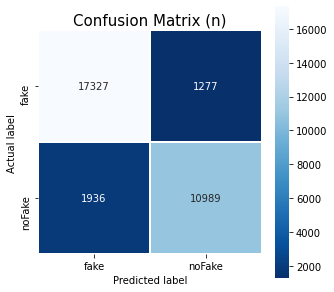

In [ ]:
cm1 = generarMatrizConfusion(y1_test,y1_pred)

Modelo 2

In [ ]:
confusion = multilabel_confusion_matrix(y2_test,y2_pred)
print(f"acc: {accuracy_score(y2_test,y2_pred)}")
print(f"precision: {precision_score(y2_test,y2_pred,average='macro')}")
print(f"recall: {recall_score(y2_test,y2_pred,average='macro')}")
print(f"f1: {f1_score(y2_test,y2_pred,average='micro')}")

acc: 0.9005042976307527
precision: 0.900089941814098
recall: 0.8934188171924509
f1: 0.9005042976307527


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y2_test,y2_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.90      0.93      0.92     18604
      noFake       0.90      0.85      0.88     12925

    accuracy                           0.90     31529
   macro avg       0.90      0.89      0.90     31529
weighted avg       0.90      0.90      0.90     31529



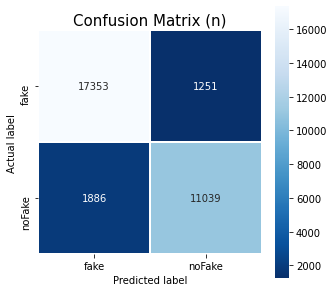

In [ ]:
cm2 = generarMatrizConfusion(y2_test,y2_pred)

Resultados Modelo 3

In [ ]:
confusion = multilabel_confusion_matrix(y3_test,y3_pred)
print(f"acc: {accuracy_score(y3_test,y3_pred)}")
print(f"precision: {precision_score(y3_test,y3_pred,average='macro')}")
print(f"recall: {recall_score(y3_test,y3_pred,average='macro')}")
print(f"f1: {f1_score(y3_test,y3_pred,average='micro')}")

acc: 0.9015509530908052
precision: 0.9013241056888821
recall: 0.8943647671285516
f1: 0.9015509530908052


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y3_test,y3_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.92      0.94      0.93     18604
      noFake       0.91      0.87      0.89     12925

    accuracy                           0.91     31529
   macro avg       0.91      0.91      0.91     31529
weighted avg       0.91      0.91      0.91     31529



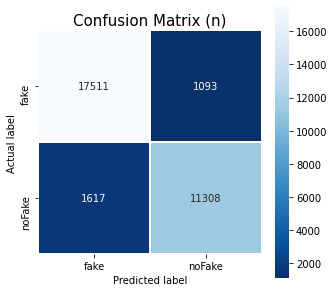

In [ ]:
cm3 = generarMatrizConfusion(y3_test,y3_pred)

# Modelo 1 Aplicado a otras muestras


In [ ]:
import joblib
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m1.joblib')


In [ ]:
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 8.36 s, sys: 747 ms, total: 9.11 s
Wall time: 8.51 s
CPU times: user 2.9 ms, sys: 2.99 ms, total: 5.89 ms
Wall time: 6.15 ms
CPU times: user 8.35 s, sys: 583 ms, total: 8.93 s
Wall time: 8.43 s
CPU times: user 4.39 ms, sys: 2.07 ms, total: 6.46 ms
Wall time: 7.35 ms
CPU times: user 8.52 s, sys: 691 ms, total: 9.21 s
Wall time: 8.71 s
CPU times: user 4.44 ms, sys: 2.08 ms, total: 6.52 ms
Wall time: 6.69 ms


In [ ]:
%time predictions1 = modelo1.predict(X1_test)
%time predictions2 = modelo1.predict(X2_test)
%time predictions3 = modelo1.predict(X3_test)

CPU times: user 1.87 s, sys: 29.6 ms, total: 1.9 s
Wall time: 1.89 s
CPU times: user 1.11 s, sys: 40.2 ms, total: 1.15 s
Wall time: 1.15 s
CPU times: user 1.97 s, sys: 32.8 ms, total: 2 s
Wall time: 1.99 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.898 | 0.903 | 0.905
precision: 0.898 | 0.902 | 0.905 
recall: 0.891 | 0.896 | 0.898  
f1: 0.898 | 0.903 | 0.905  


# Modelo 2 Aplicado a otras muestras


In [ ]:
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m2.joblib')


In [ ]:
%time predictions1 = modelo2.predict(X1_test)
%time predictions2 = modelo2.predict(X2_test)
%time predictions3 = modelo2.predict(X3_test)

CPU times: user 485 ms, sys: 2.85 ms, total: 488 ms
Wall time: 486 ms
CPU times: user 502 ms, sys: 2.8 ms, total: 504 ms
Wall time: 502 ms
CPU times: user 494 ms, sys: 785 µs, total: 495 ms
Wall time: 493 ms


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.902 | 0.901 | 0.905
precision: 0.903 | 0.9 | 0.905 
recall: 0.895 | 0.893 | 0.898  
f1: 0.902 | 0.901 | 0.905  


# Modelo 3 Aplicado a otras muestras


In [ ]:
modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloDTree_m3.joblib')


In [ ]:
%time predictions1 = modelo3.predict(X1_test)
%time predictions2 = modelo3.predict(X2_test)
%time predictions3 = modelo3.predict(X3_test)

CPU times: user 494 ms, sys: 1.84 ms, total: 496 ms
Wall time: 493 ms
CPU times: user 506 ms, sys: 1.84 ms, total: 508 ms
Wall time: 505 ms
CPU times: user 493 ms, sys: 792 µs, total: 494 ms
Wall time: 492 ms


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.903 | 0.904 | 0.902
precision: 0.903 | 0.903 | 0.901 
recall: 0.896 | 0.897 | 0.894  
f1: 0.903 | 0.904 | 0.902  
